In [22]:
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '14px'
      break
    }
  }
  '''))
increase_font()
get_ipython().events.register('pre_run_cell', increase_font)
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

!gdown --id 1TFWi2OzxbiB979KJ-c3YIZtB0hcxnDio
!gdown --id 1NM0_jz7OdH7d8FHZpkvKBu9C6rEIXLGH


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloading...
From: https://drive.google.com/uc?id=1TFWi2OzxbiB979KJ-c3YIZtB0hcxnDio
To: /content/master.csv
2.71MB [00:00, 82.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NM0_jz7OdH7d8FHZpkvKBu9C6rEIXLGH
To: /content/DATA.csv
13.0MB [00:00, 114MB/s]


## Solving the sub parts of **Q1 A** in order

In [23]:
df=pd.read_csv('/content/master.csv')
df=df.drop(columns=['country-year']) #Redundant data
df[' gdp_for_year ($) '].replace(',','', regex=True, inplace=True) #Correcting the data
df['age'].replace('years','', regex=True, inplace=True)
df[' gdp_for_year ($) '] = pd.to_numeric(df[' gdp_for_year ($) '])
df=df.rename(columns={'year':'year',' gdp_for_year ($) ':'gdp_for_year ($)'})
df['age'].replace("5-14","05-14",regex=True,inplace=True)
display(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54,107,3620833,2.96,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+,9,348465,2.58,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,05-14,60,2762158,2.17,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,05-14,44,2631600,1.67,0.675,63067077179,2309,Generation Z


In [24]:
 df.shape[0] #number of rows



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

27820

In [25]:
df.shape[1] #number of columns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

11

In [26]:
df.dtypes #datatypes of variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
HDI for year          float64
gdp_for_year ($)        int64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [27]:
print("Number of unique values for :")   #Number of unique values for each column
for a in df.columns:
  print(str(a), "is", str(len(pd.unique(df[a]))))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Number of unique values for :
country is 101
year is 32
sex is 2
age is 6
suicides_no is 2084
population is 25564
suicides/100k pop is 5298
HDI for year is 306
gdp_for_year ($) is 2321
gdp_per_capita ($) is 2233
generation is 6


We have the following classification:


1. **Nominal** - Country, Sex , Generation
2. **Ordinal** - Age
3. **Temporal** - Year
4. **Integer** - suicides_no, population, gdp_for_year ($), gdp_per_capita 
5. **Continuous** - suicides/100k pop, HDI for year






In [28]:
print(df.isnull().sum()) #Getting sum of missing/null values for each variable

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
HDI for year          19456
gdp_for_year ($)          0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [29]:
print(df.shape[0]-df.isnull().any(axis = 1).sum()) #total number of unique entries

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

8364


## Solving the sub-parts of **Q1 B** in order

In [30]:
discrete_variables=['country','year','sex','age','generation'] #list containing the discrete variables to be plotted

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

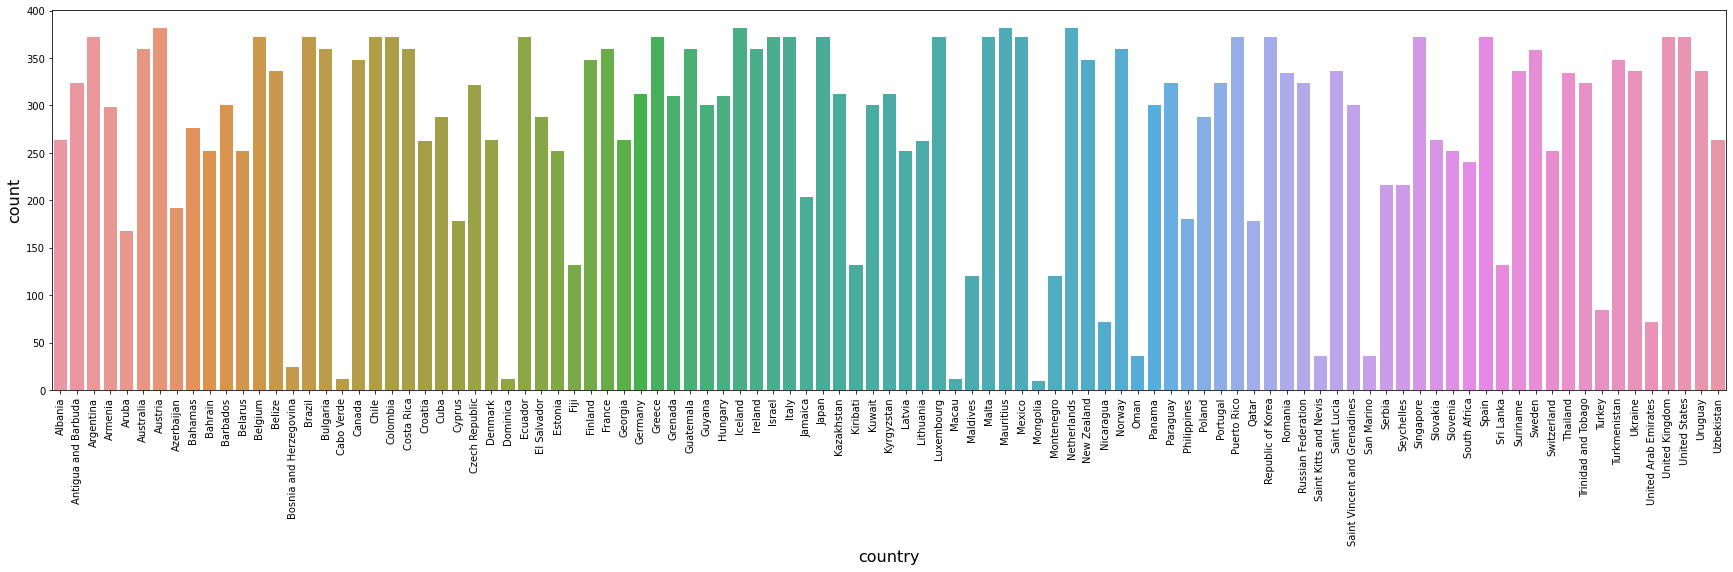

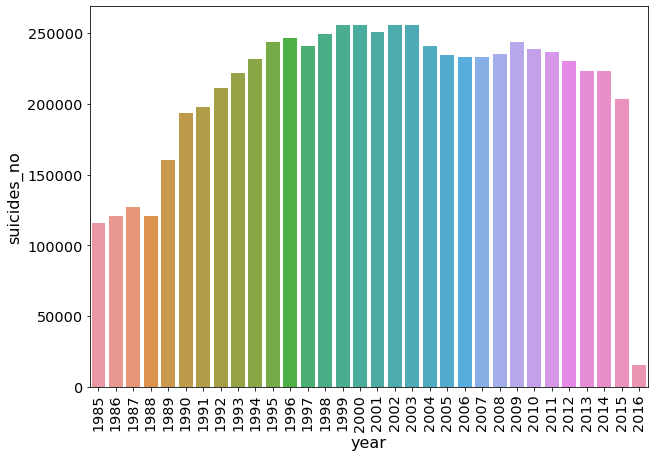

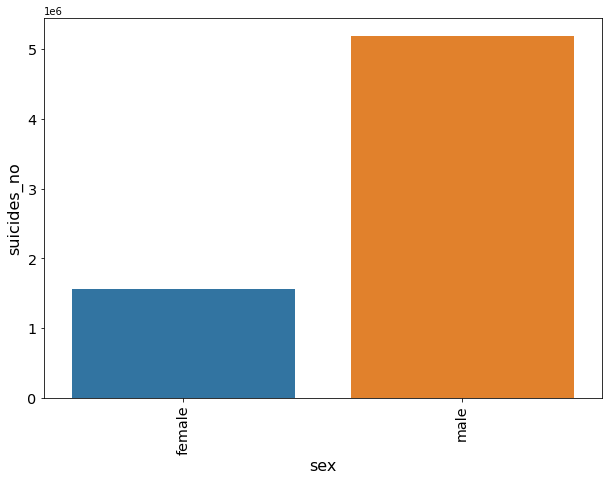

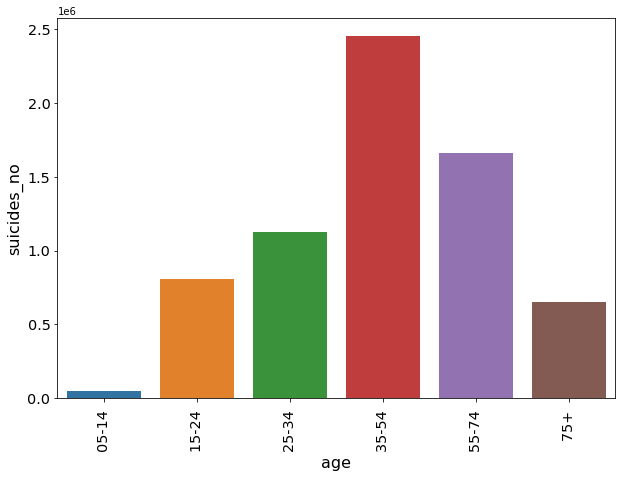

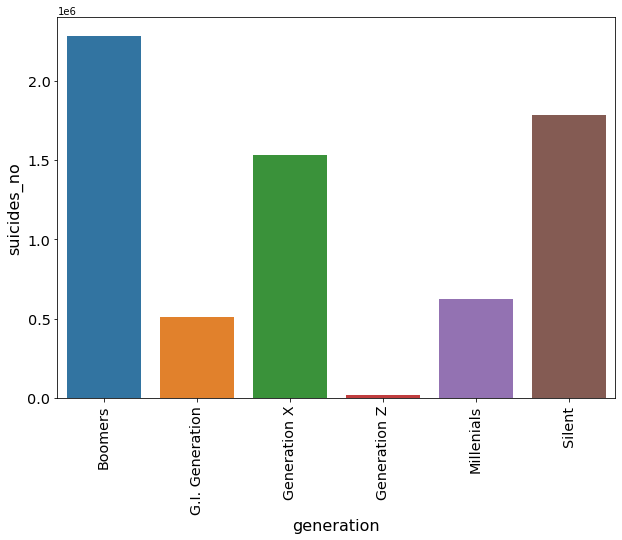

In [31]:
fig = plt.figure(figsize=(30,7)) #code for histogram of 'country' as it contains 101 discrete points.
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
                                          
plt.xticks(fontsize='medium',rotation=90) #rotating x ticks by 90 degrees for better visualization and increasing fontsize
plt.yticks(fontsize='medium')

plot = sns.countplot(x='country',data=df)
plt.xlabel(discrete_variables[0])
plt.show()


                                          
                                              #temp_data is a temporary dataframe containg of only 2 required columns wherein discrete_variables[i] is made the index. We then plot the bar
for i in range(1,5):                          # graph for this temp_data
  fig = plt.figure(figsize=(10,7))           
  temp_data=pd.DataFrame(columns=[discrete_variables[i], 'suicides_no'], data=df[[discrete_variables[i],'suicides_no']].values).groupby([discrete_variables[i]]).sum() 
  plt.xticks(fontsize='x-large',rotation=90)
  plt.yticks(fontsize='x-large')
  plot = sns.barplot(x = temp_data.index, y = temp_data['suicides_no'], ci=0) 
  plt.xlabel(discrete_variables[i])
  plt.show()


In [32]:
def pandas_entropy(column):      #code to find mode and entropy
  vc = pd.Series(column).value_counts(normalize=True, sort=False)
  return -(vc * np.log(vc)).sum()
for col in discrete_variables:  
    print("Mode of %s : %s" % (str(col),str(df[col].mode().values[0])))
    print('Entropy : ', pandas_entropy(df[col]))
    print()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mode of country : Austria
Entropy :  4.512115046503916

Mode of year : 2009
Entropy :  3.4329561237563206

Mode of sex : female
Entropy :  0.6931471805599453

Mode of age : 15-24 
Entropy :  1.7917561564428144

Mode of generation : Generation X
Entropy :  1.695449187635522



## Solving **Q1 C** in order

In [33]:
con_variables = ['suicides_no','population','suicides/100k pop', 'gdp_for_year ($)','gdp_per_capita ($)','HDI for year'] #defining the list of continuous variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
for col in con_variables:     #Printing various parameters of con_variables
    
    for  i in range(0,3):
        print(" ")
    
    print(" For variable ", col,":")

    dictionary={'Mean':df[col].mean(),
    'Variance':df[col].var(),
    'Skewness':df[col].skew(),
    'Minimum':df[col].min(),
    'Maximum':df[col].max(),
    'Median':df[col].median(),
    '25-percentile': pd.DataFrame(df[col].quantile([0.25])).iloc[0,0],        #The syntax data[col].quantile([n]) returns a series. So we convert it to a dataframe and then locate 
    'Inter-quartile Range':pd.DataFrame(df[col].quantile([0.5])).iloc[0,0],   # the element at [0,0] to get the value of nth percentile.
    '75 Perentile':pd.DataFrame(df[col].quantile([0.25])).iloc[0,0]}
    
    display(dictionary)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 
 
 
 For variable  suicides_no :


{'25-percentile': 3.0,
 '75 Perentile': 3.0,
 'Inter-quartile Range': 25.0,
 'Maximum': 22338,
 'Mean': 242.57440690150972,
 'Median': 25.0,
 'Minimum': 0,
 'Skewness': 10.352910335856805,
 'Variance': 813690.4442639275}

 
 
 
 For variable  population :


{'25-percentile': 97498.5,
 '75 Perentile': 97498.5,
 'Inter-quartile Range': 430150.0,
 'Maximum': 43805214,
 'Mean': 1844793.6173975556,
 'Median': 430150.0,
 'Minimum': 278,
 'Skewness': 4.459414421535874,
 'Variance': 15302018400947.766}

 
 
 
 For variable  suicides/100k pop :


{'25-percentile': 0.92,
 '75 Perentile': 0.92,
 'Inter-quartile Range': 5.99,
 'Maximum': 224.97,
 'Mean': 12.816097411933894,
 'Median': 5.99,
 'Minimum': 0.0,
 'Skewness': 2.963414476605633,
 'Variance': 359.53889995312005}

 
 
 
 For variable  gdp_for_year ($) :


{'25-percentile': 8985352832.0,
 '75 Perentile': 8985352832.0,
 'Inter-quartile Range': 48114688201.0,
 'Maximum': 18120714000000,
 'Mean': 445580969025.7271,
 'Median': 48114688201.0,
 'Minimum': 46919625,
 'Skewness': 7.233755024143678,
 'Variance': 2.1129819912271505e+24}

 
 
 
 For variable  gdp_per_capita ($) :


{'25-percentile': 3447.0,
 '75 Perentile': 3447.0,
 'Inter-quartile Range': 9372.0,
 'Maximum': 126352,
 'Mean': 16866.464414090584,
 'Median': 9372.0,
 'Minimum': 251,
 'Skewness': 1.9634699942792686,
 'Variance': 356740544.99342066}

 
 
 
 For variable  HDI for year :


{'25-percentile': 0.713,
 '75 Perentile': 0.713,
 'Inter-quartile Range': 0.779,
 'Maximum': 0.9440000000000001,
 'Mean': 0.7766011477761785,
 'Median': 0.779,
 'Minimum': 0.483,
 'Skewness': -0.30087744889575657,
 'Variance': 0.008717342272985932}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

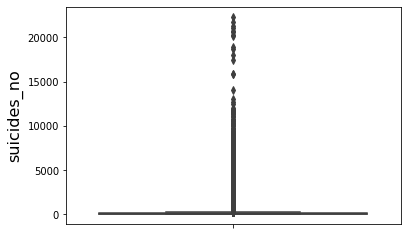

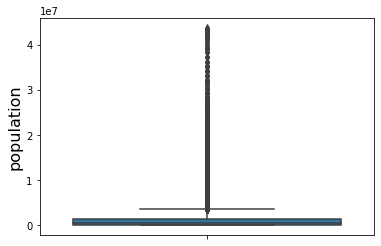

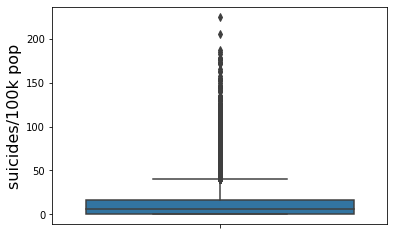

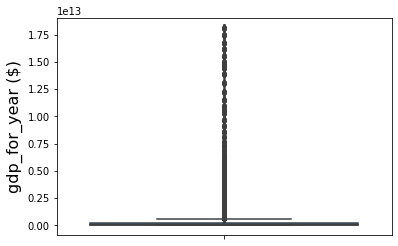

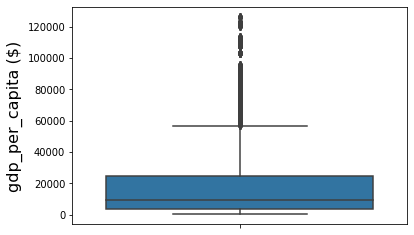

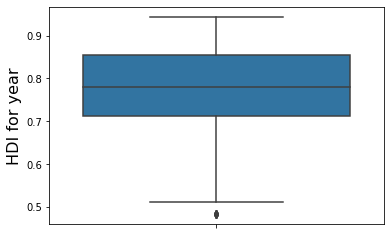

In [35]:
for i,col in enumerate(con_variables):
    plt.figure()
    # seaborn box-and-whisker plot
    sns.boxplot(y=col,data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

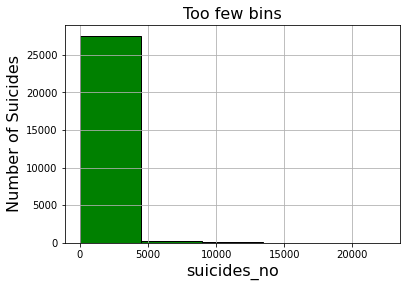

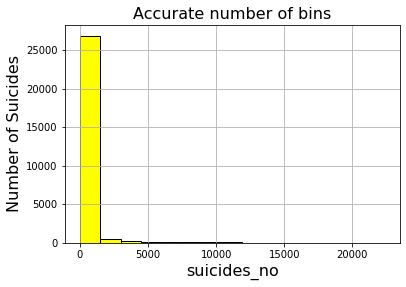

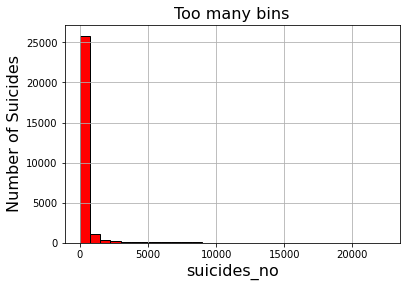

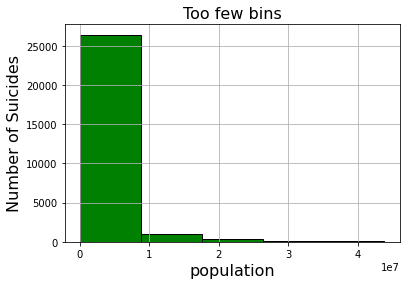

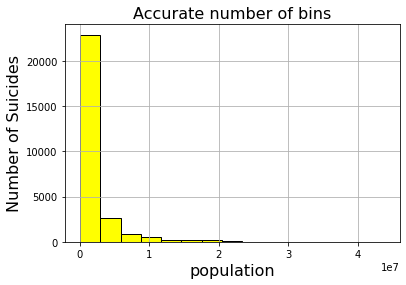

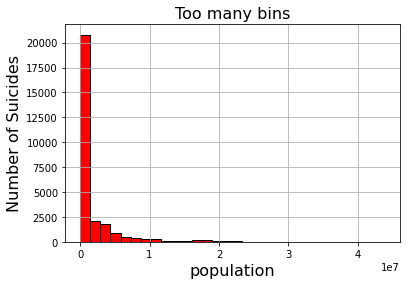

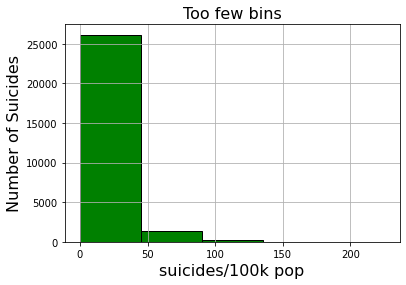

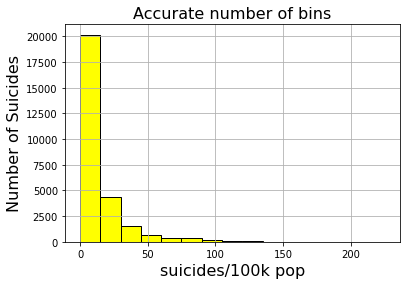

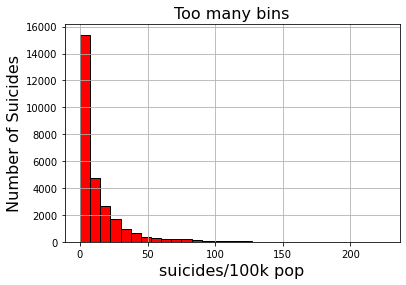

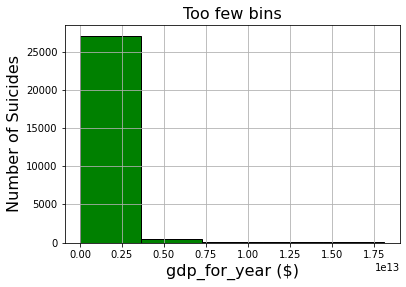

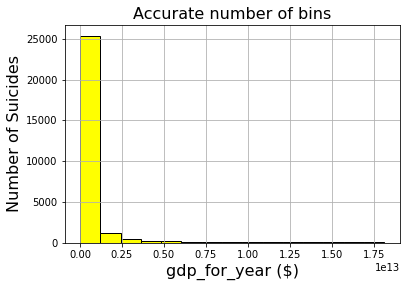

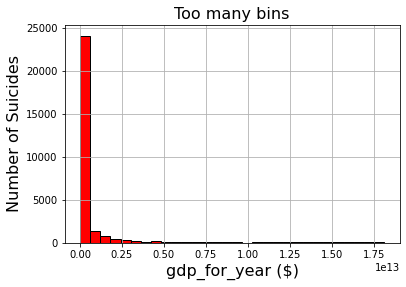

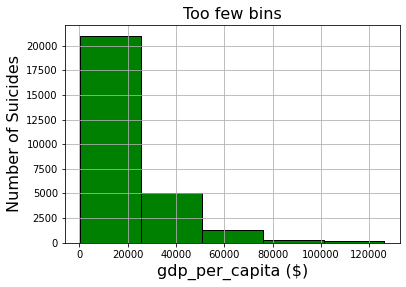

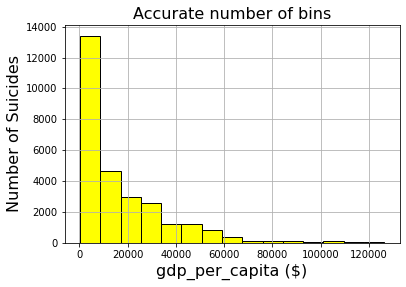

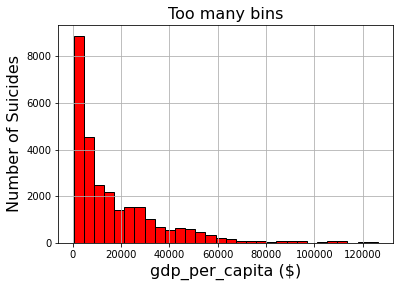

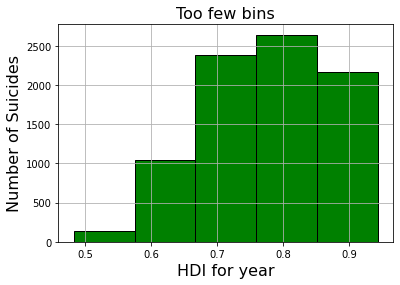

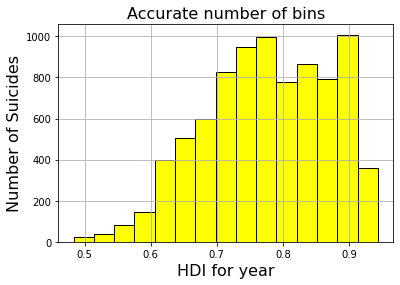

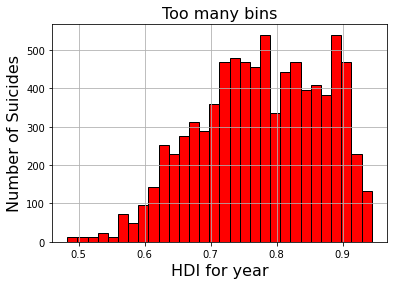

In [36]:
plt.rcParams['axes.labelsize'] = 16   #Describing the graph layouts and specifications
plt.rcParams['axes.titlesize'] = 16
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
fig = plt.figure(figsize=(20,7))
for col in con_variables:
    %matplotlib inline
    df.hist(col, bins=5, edgecolor="black", color="green") 
    plt.ylabel("Number of Suicides")
    plt.xlabel(col) #Too few bins
    plt.title("Too few bins")
    print(" ")
    
    df.hist(col, bins=15, edgecolor="black", color="yellow")
    plt.ylabel("Number of Suicides")
    plt.xlabel(col) #Accurate number of bins
    plt.title("Accurate number of bins")
    print(" ")

    df.hist(col, bins=30, edgecolor="black", color="red")
    plt.ylabel("Number of Suicides")
    plt.xlabel(col) #Too many bins
    plt.title("Too many bins")
    print(" ")
    
    plt.show()
    
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

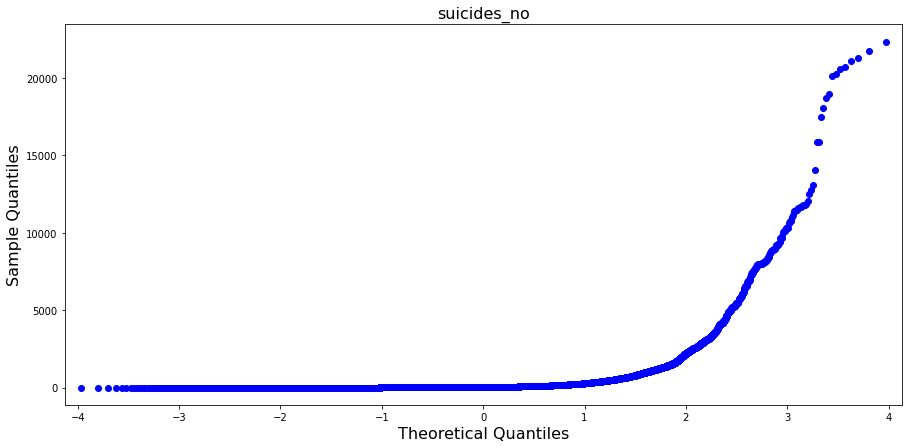

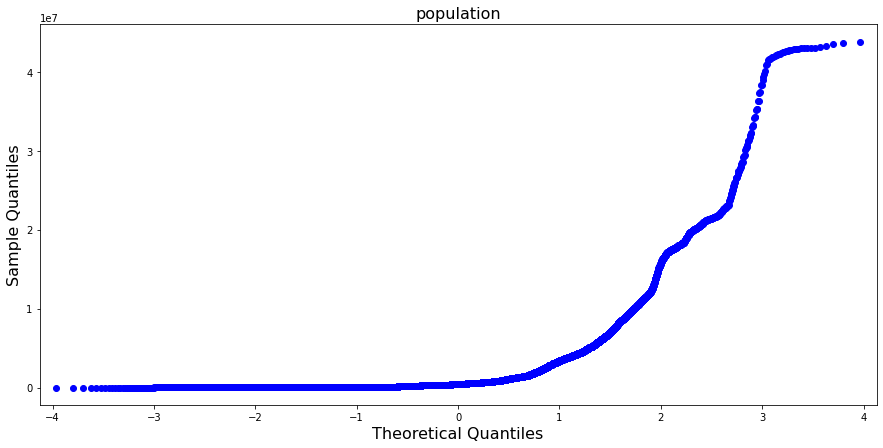

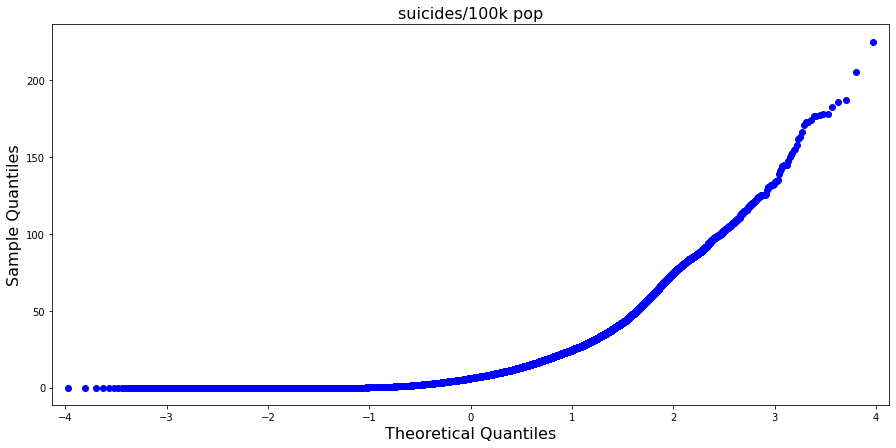

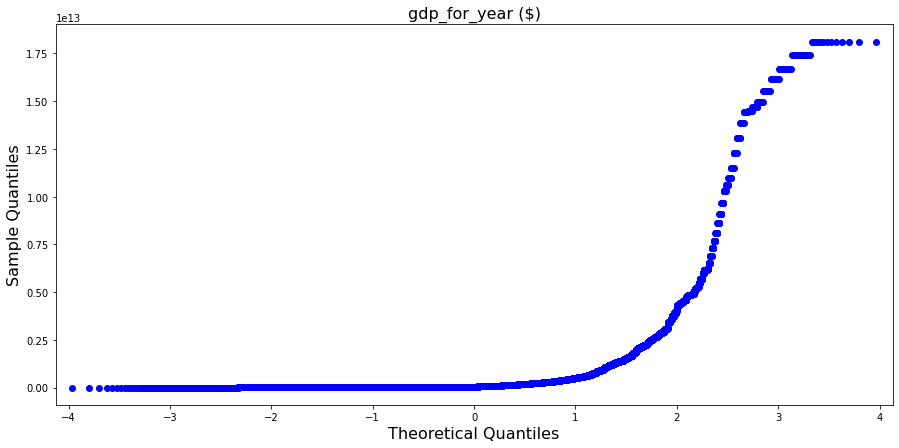

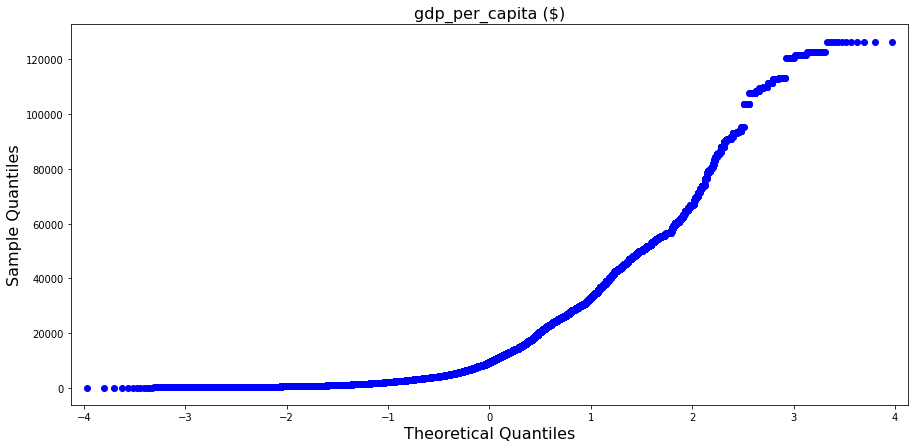

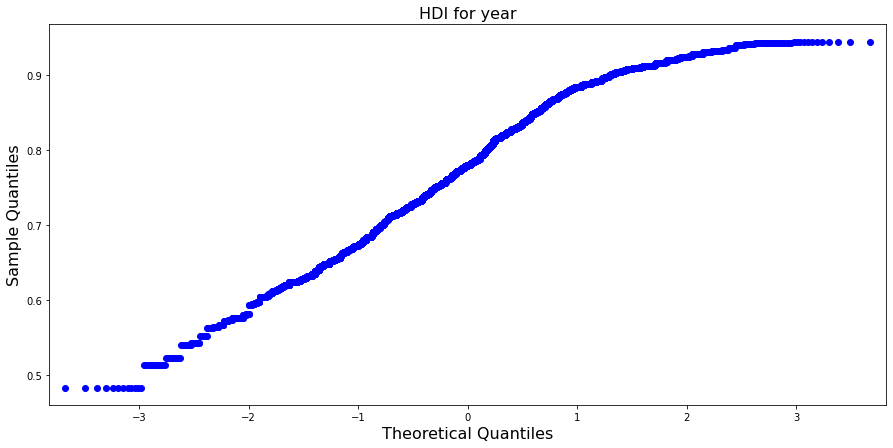

In [54]:
import statsmodels.api as sm   #QQ plot
for col in con_variables:
    fig = sm.qqplot(df[col].dropna())
    plt.title(col)
    plt.show()

By inspection if curve is below y=x line, it's right skewed and vice versa for left skewed and if overlaps y=x, then normal.

---


**skewed_right** = suicides_no, population, suicides/100k pop, gdp_for_year,gdp_per_capita ($)

---


**skewed_left** = HDI for year 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


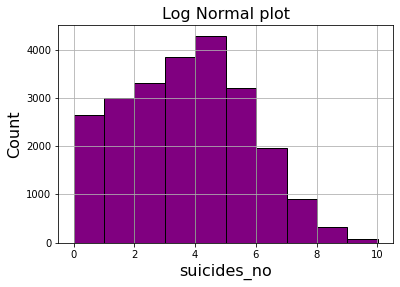

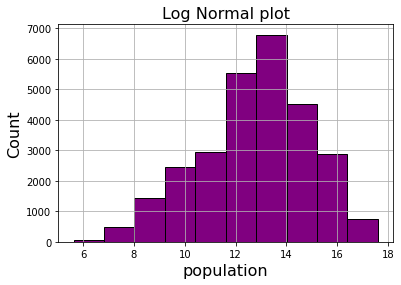

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


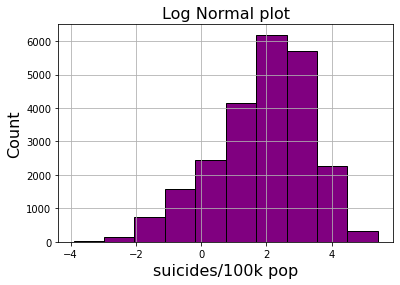

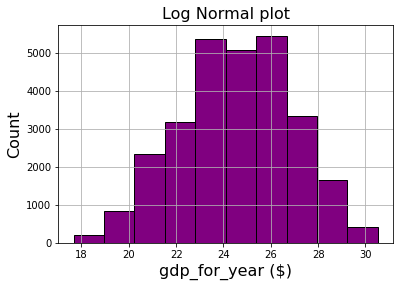

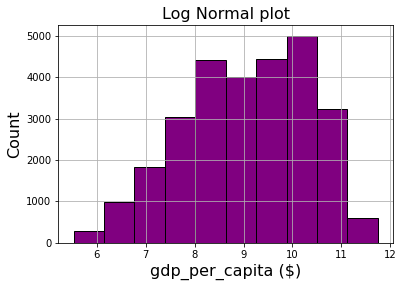

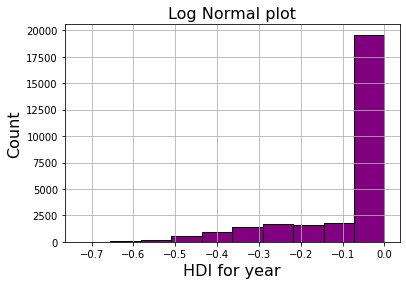

In [38]:
var_for_log=['suicides_no','population','suicides/100k pop','gdp_for_year ($)','gdp_per_capita ($)','HDI for year'] #To check for log normal distribution
fig=plt.figure(figsize=(12,7))
for col in var_for_log:
    %matplotlib inline
    new_var=pd.DataFrame(np.log(df[col]))      #Converting to dataframe of the log values of that variable
    new_var[col]= new_var[col].fillna(0)
    new_var=new_var[new_var[col] != -math.inf]
    new_var.hist(col, edgecolor='black', color='purple')
    plt.xticks(fontsize='medium')
    plt.yticks(fontsize='medium')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title("Log Normal plot")
    plt.show()

    
    
    

As can be seen the log normal plots of population, suicides/100k pop, gdp_for_year ($) and gdp_per_capita are approximately normal.


1.  Left Skew  - suicides_no, gdp_for_year ($), gdp_per_capita 

2.  Right Skew - population, suicides/100k pop, HDI for year



# Solving **Q1 D**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

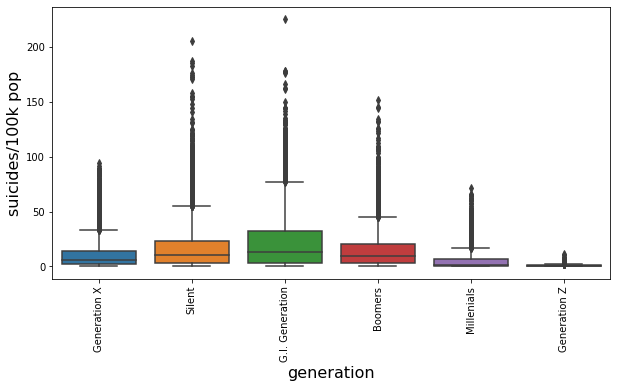

In [39]:
fig = plt.figure(figsize=(10,5)) #Box and Whiskers plot for discrete and continuous data types as generation and suicides/100k pop
plt.xticks(fontsize='medium', rotation=90)
plot = sns.boxplot(x = 'generation',y = 'suicides/100k pop', data = df) 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

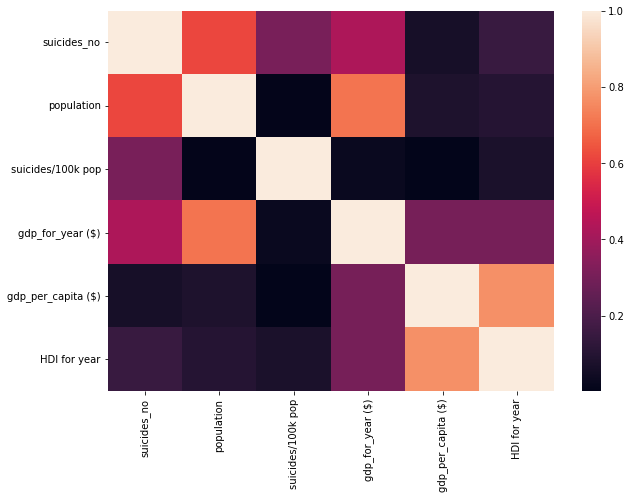

In [40]:
fig = plt.figure(figsize=(10,7))
#using sns.heatmap for plotting correlational heatmap
sns.heatmap(df[con_variables].corr())
plt.show()

## Solving Q1 D, **EDA** for another file
### It consists of stock prices for chosen 5 tickers for each day in February 2009

In [41]:
df2=pd.read_csv('/content/DATA.csv')
df2=df2.drop(columns=['ind','macd','rsi','cci','adx','turbulence'])
df2=df2.rename(columns={'datadate':'date', 'tic':'stock', 'adjcp':'close'}) #cleaning and modifying the data.
df2=df2.iloc[0:(30*28)]
for i in range(5,840,30):
    for j in range(0,25,1):
        df2=df2.drop([i+j],axis=0)
n_list = list(range(1, 141))
df2.insert(0, "Index",n_list, True)   
df2=df2.set_index('Index')    
      
display(df2)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,date,stock,close,open,high,low,volume
Index,,,,,,,
1,20090102,AAPL,12.964286,12.268571,13.005714,12.165714,26641980.0
2,20090102,AXP,19.330000,18.570000,19.520000,18.400000,10955620.0
3,20090102,BA,45.250000,42.800000,45.560000,42.780000,7010171.0
4,20090102,CAT,46.910000,44.910000,46.980000,44.710000,7116726.0
5,20090102,CSCO,16.960000,16.410000,17.000000,16.250000,40977480.0
...,...,...,...,...,...,...,...
136,20090211,AAPL,13.831429,13.767143,14.044286,13.681429,23963760.0
137,20090211,AXP,16.360000,16.300000,16.650000,15.830000,13389860.0
138,20090211,BA,40.330000,40.510000,40.760000,39.860000,6519292.0


In [42]:
df2.dtypes #Exploring the pyhton datatypes of each and every variable

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

date        int64
stock      object
close     float64
open      float64
high      float64
low       float64
volume    float64
dtype: object

We have the following classification:


1. **Nominal** - stock
2. **Temporal** - date 
3. **Continuous** - close, open, high, low, volume

In [43]:
imp_variables=['date','stock','volume'] #3 important varibales in the data
for a in imp_variables:
  print("Number of unique values for", a,"are",str(len(pd.unique(df2[a]))))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Number of unique values for date are 28
Number of unique values for stock are 5
Number of unique values for volume are 140


Plotting line chart to track the price movement of each ticker

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

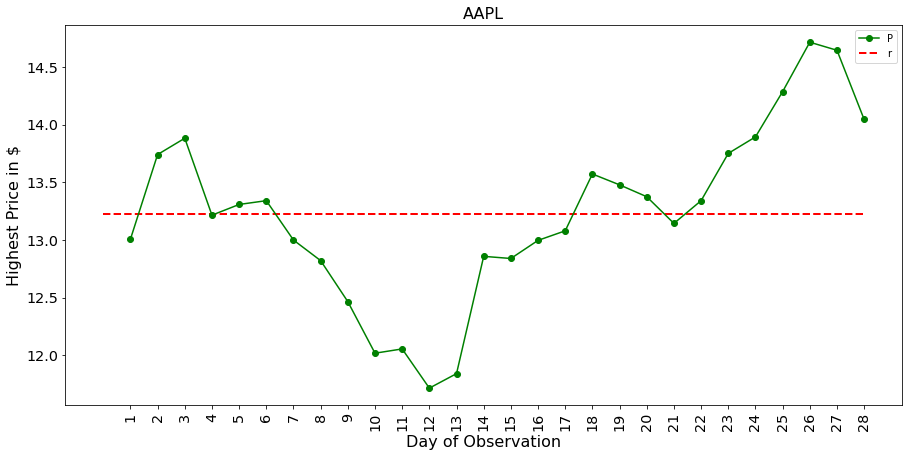

Mean of ticker AAPL is 13.228723979591837 $
Variance of ticker AAPL is 0.5897306425404927 $
Overall change in ticker price AAPL is 1.0385714285714283 $
 


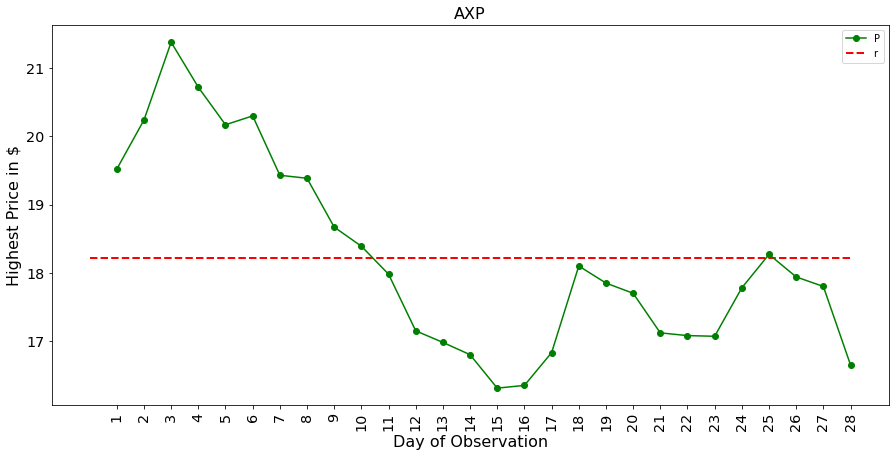

Mean of ticker AXP is 18.213060714285714 $
Variance of ticker AXP is 2.0070780809920636 $
Overall change in ticker price AXP is -2.870000000000001 $
 


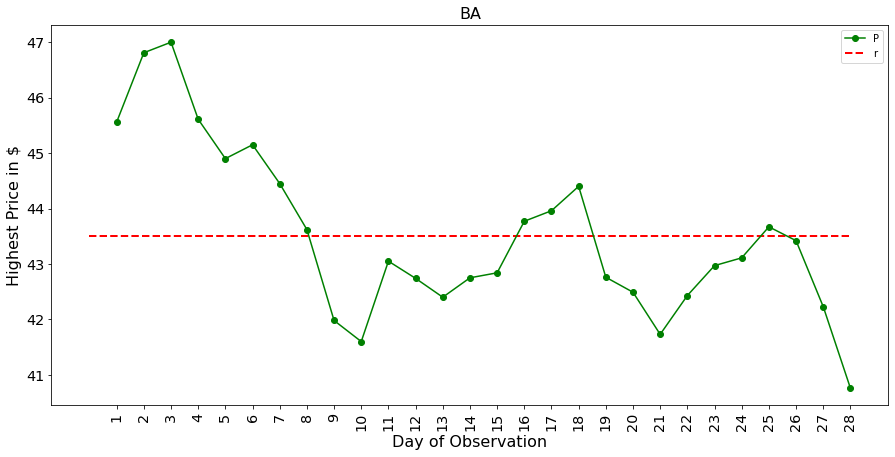

Mean of ticker BA is 43.50571428571429 $
Variance of ticker BA is 2.3310253968253987 $
Overall change in ticker price BA is -4.800000000000004 $
 


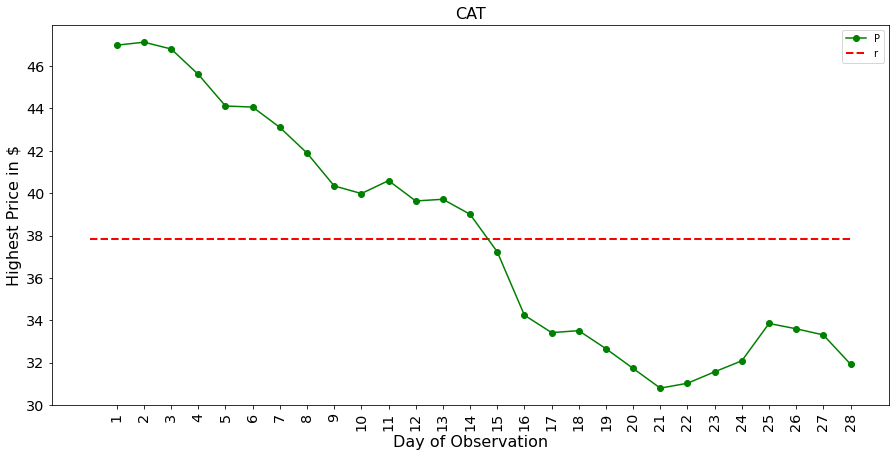

Mean of ticker CAT is 37.85285714285715 $
Variance of ticker CAT is 30.818680423280423 $
Overall change in ticker price CAT is -15.049999999999997 $
 


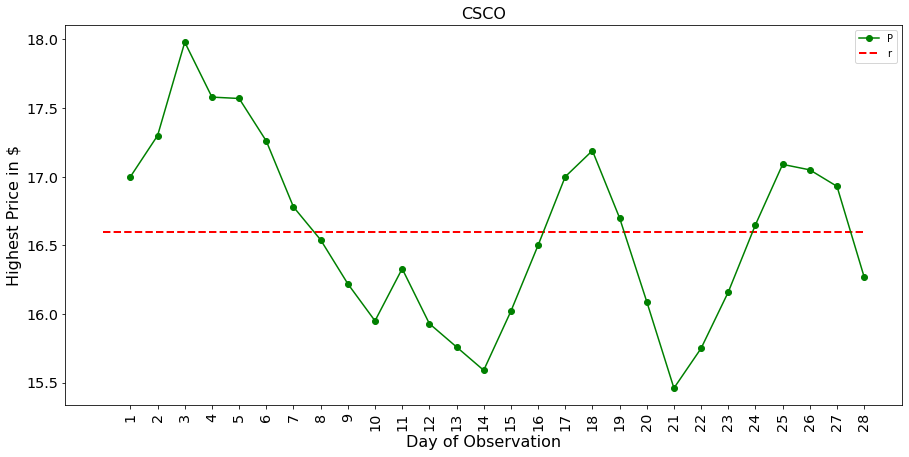

Mean of ticker CSCO is 16.594642857142855 $
Variance of ticker CSCO is 0.43496653439153465 $
Overall change in ticker price CSCO is -0.7300000000000004 $
 


In [44]:

for i in range(0,5,1):
    d=[]
    graph_data=pd.DataFrame(d)
    for j in range(0,28,1):
     graph_data=graph_data.append(df2.iloc[i+5*j], ignore_index=True)
    day_list = list(range(1,29))
    graph_data.insert(0, "Index",day_list, True) 
    
        
    fig=plt.figure(figsize=[15,7])
    plt.hlines(y=graph_data['high'].mean(),xmin=0,xmax=28,colors='red', linestyles='--', lw=2, label='Mean Price')
    plt.plot(graph_data['Index'],graph_data['high'],marker='o',color='green')
    plt.xticks(graph_data['Index'],rotation=90,fontsize='x-large')
    plt.yticks(fontsize='x-large')
    plt.xlabel("Day of Observation",)
    plt.ylabel("Highest Price in $")
    plt.title(graph_data.iloc[1,6])
    plt.legend("Price")
    plt.show()
    print("Mean of ticker", str(graph_data.iloc[1,6]),"is", str(graph_data['high'].mean()), "$")
    print("Variance of ticker", str(graph_data.iloc[1,6]),"is", str(graph_data['high'].var()), "$")
    print("Overall change in ticker price", str(graph_data.iloc[1,6]),"is", str(graph_data.iloc[27,3]-graph_data.iloc[0,3]),"$")
    print(" ")




Plotting Bar graph for some closing prices on the first and last day of observation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

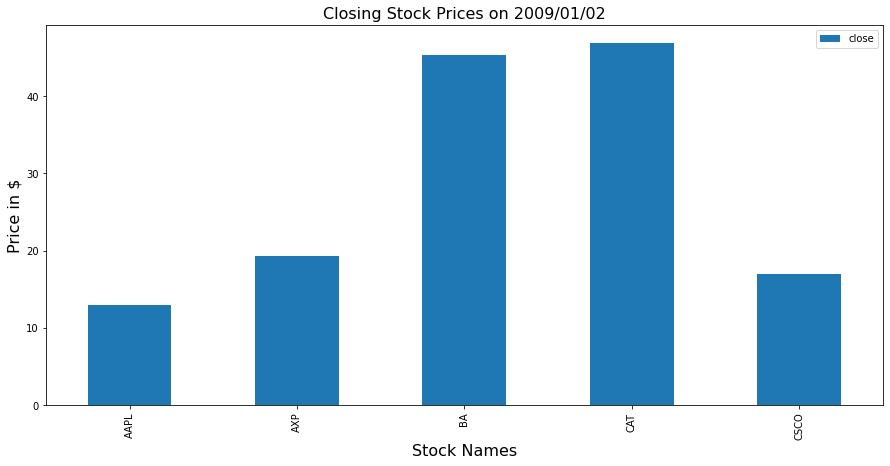

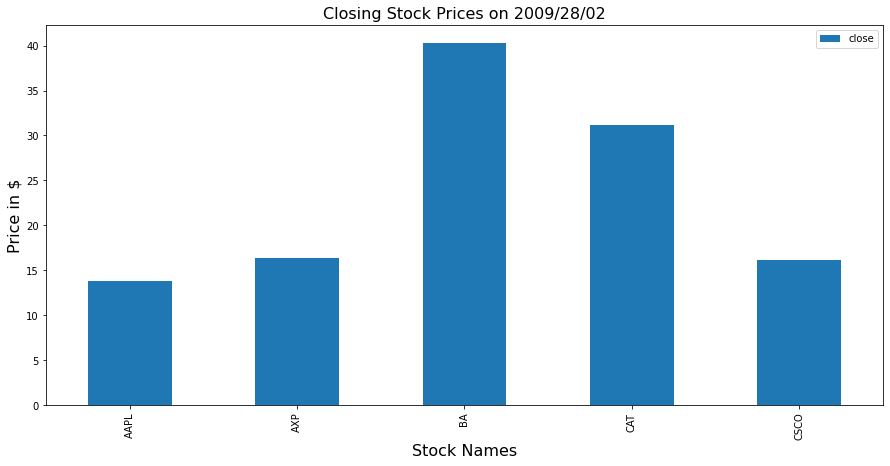

In [45]:
df_for_plot=df2.iloc[0:5]
plt.rcParams["figure.figsize"] = (15,7)
df_for_plot.plot(x="stock", y="close", kind="bar")
plt.xticks(fontsize='medium', rotation=90)
plt.yticks(fontsize='medium')
plt.xlabel("Stock Names")
plt.ylabel("Price in $")
plt.title("Closing Stock Prices on 2009/01/02")
plt.show()

print(" ")

df_for_plot=df2.iloc[135:140]
df_for_plot.plot(x="stock", y="close", kind="bar")
plt.rcParams["figure.figsize"] = (15,7)
plt.xticks(fontsize='medium', rotation=90)
plt.yticks(fontsize='medium')
plt.xlabel("Stock Names")
plt.ylabel("Price in $")
plt.title("Closing Stock Prices on 2009/28/02")
plt.show()



Calculating the **correlation** of quntities of all stocks

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

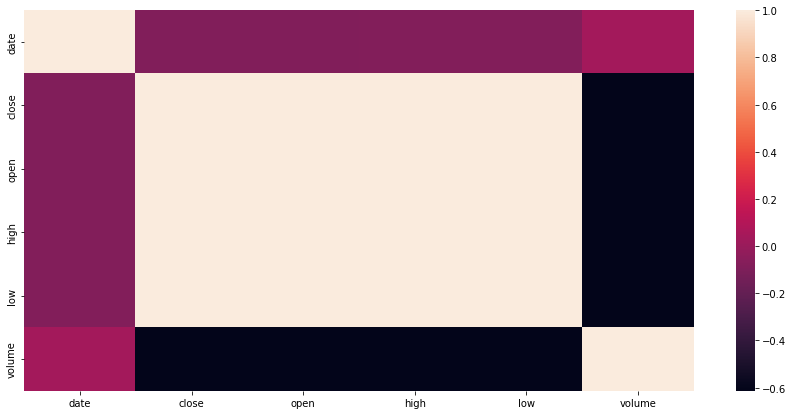

In [46]:
fig = plt.figure(figsize=(15,7))
#using sns.heatmap for plotting correlational heatmap
sns.heatmap(df2.corr())
plt.show()

   

## Solving **Q2** in order

Q2 A

In [47]:
avg_count={} #dictionary for count of top six countries
i=0
for country_name in df['country'].unique():
    tot=df.iloc[i:i+df.country.str.count(country_name).sum(),4].sum()
    avg_count[country_name]=float(tot/df.country.str.count(country_name).sum())
    i=i+df.country.str.count(country_name).sum()

alpha=pd.DataFrame(sorted(avg_count.items(), key =lambda kv:(kv[1], kv[0]),reverse=True), index=list(range(1,102)),columns=['Country','Avg Yearly suicides'])
top_six_countries=alpha['Country']
alpha.head(6)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Country,Avg Yearly suicides
1,Russian Federation,3733.771605
2,United States,2779.604839
3,Japan,2169.091398
4,Ukraine,952.232143
5,Germany,933.532051
6,France,914.241667


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

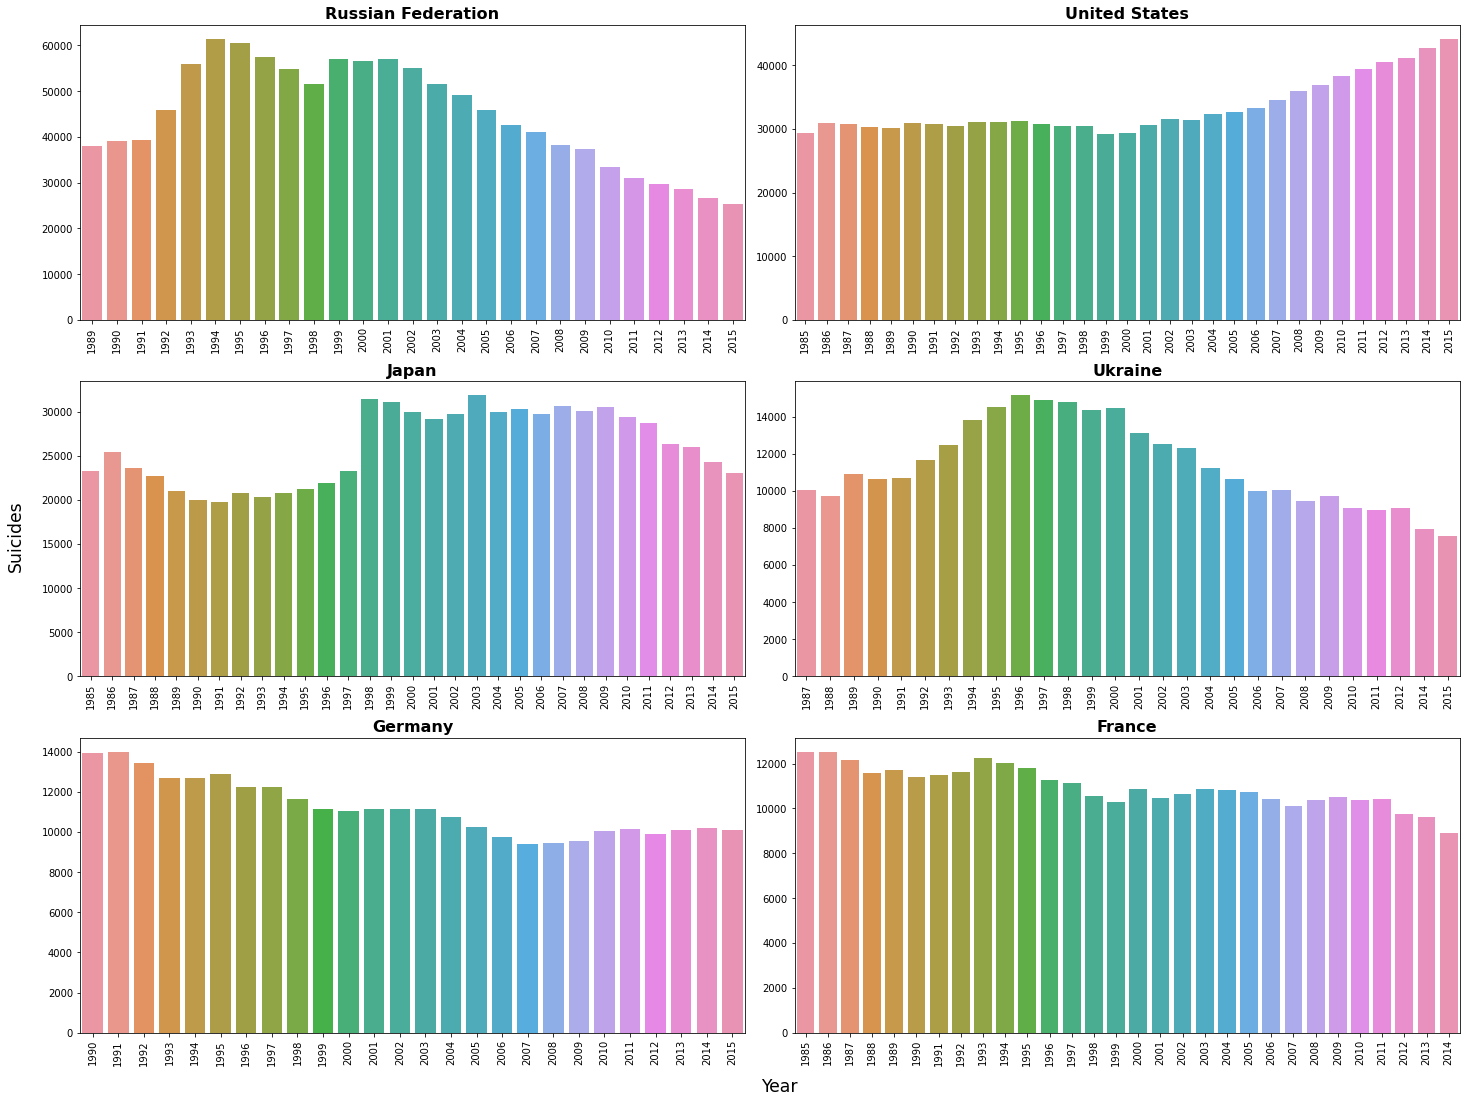

In [48]:
# Groupby country and years for use
df2 = df.groupby(['country','year']).sum()
# grouping by country and taking mean, year becomes index now
df3 = df2.groupby(['country']).mean()
# picking top six countries by suicides numbers and forming list
list_idx = df3.nlargest(6,'suicides_no').index.tolist()
f = plt.figure(figsize=(20,15))
for i in range(6):
    # adding subplots to create a 3x2 matrix
    f.add_subplot(3, 2, i+1)
    #rotating x ticks by 90 degrees for better visualization and increasing fontsize
    plt.xticks(rotation=90)
    
    #pickinh ith highest country
    df3 = df2.xs(list_idx[i],level='country')['suicides_no'] 
    ax = sns.barplot(x=df3.index,y=df3.values)
    ax.set(xlabel='')
    plt.title(list_idx[i],weight='bold')
    # adding a common x and y label
f.text(0.52,-0.01, "Year", ha="center", va="center",size='xx-large')
f.text(-0.01,0.50, "Suicides", ha="center", va="center", rotation=90,size='xx-large')
plt.tight_layout()
plt.show()

Q2 B

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

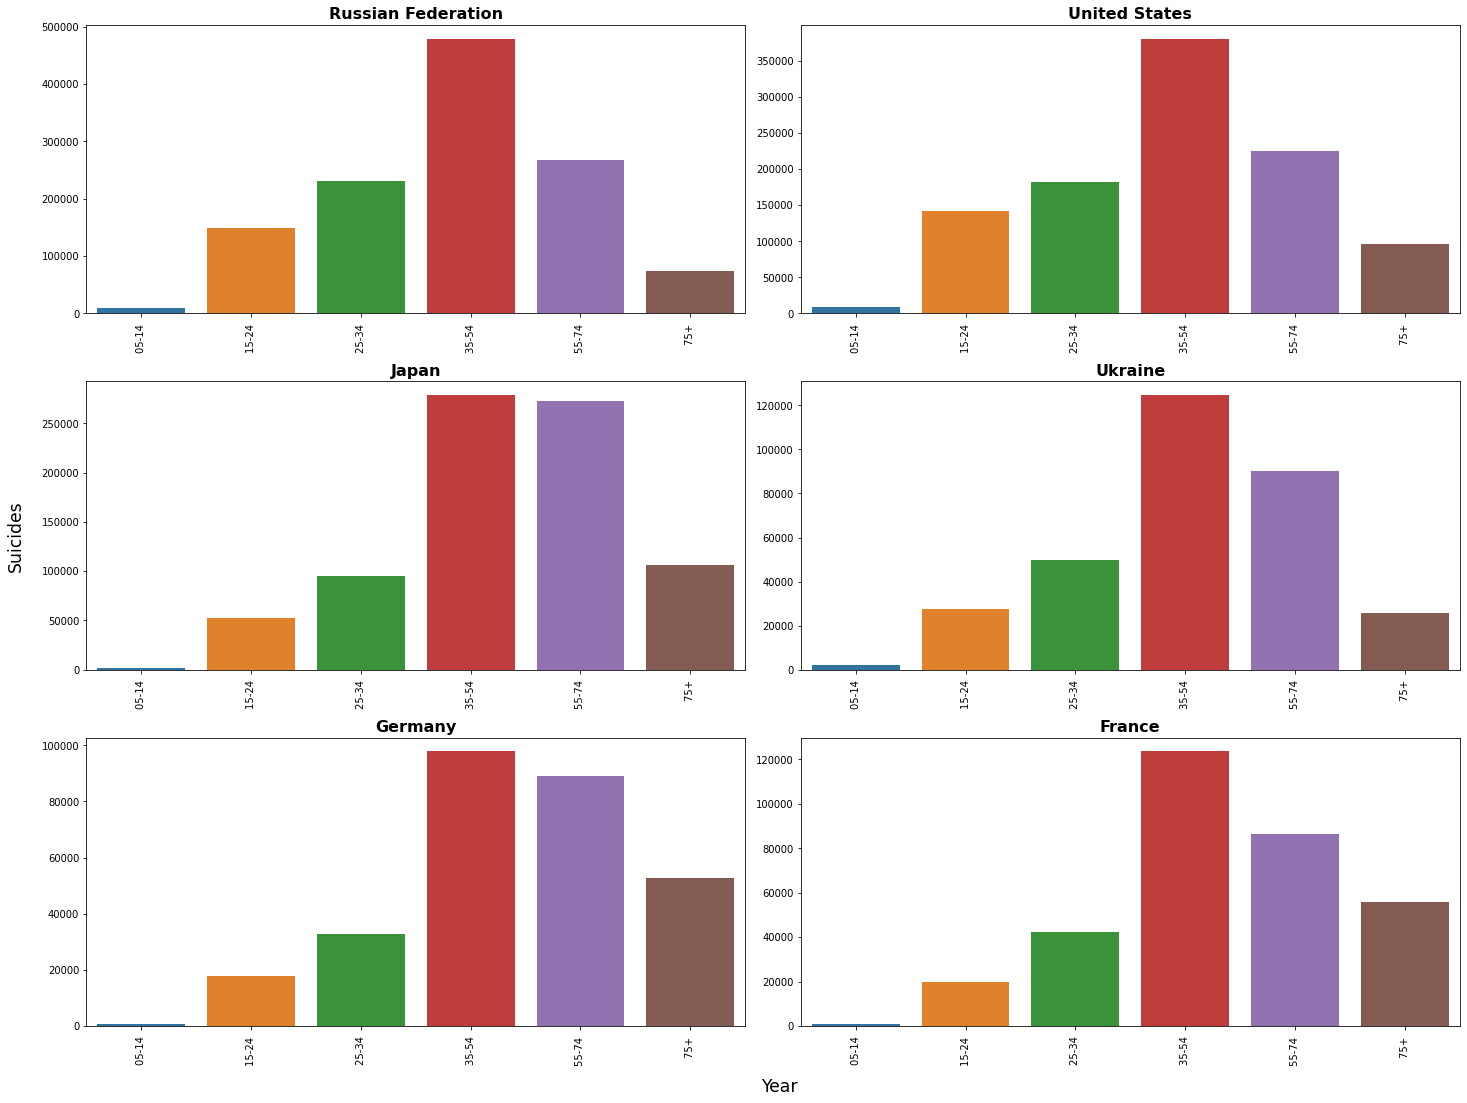

In [49]:
# Same analysis but with age instead of year
df2 = df.groupby(['country','age']).sum()
f = plt.figure(figsize=(20,15))
for i in range(6):
    f.add_subplot(3, 2, i+1)
    #rotating x ticks by 90 degrees for better visualization
    plt.xticks(rotation=90)
    df3 = df2.xs(list_idx[i],level='country')
    df3 = df3.sort_index()
    ax = sns.barplot(x = df3.index,y = df3.suicides_no)
    ax.set(xlabel='',ylabel='')
    plt.title(list_idx[i],weight='bold')
f.text(0.52,-0.01, "Year", ha="center", va="center",size='xx-large')
f.text(-0.01,0.50, "Suicides", ha="center", va="center", rotation=90,size='xx-large')
plt.tight_layout()
plt.show()


From all countries's data,it is seemingly evident that age(35-54) has the highest suicide incidence, probably due to stress and burden of family, and least in age(5-14) due to childhood age.

Q2 C

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

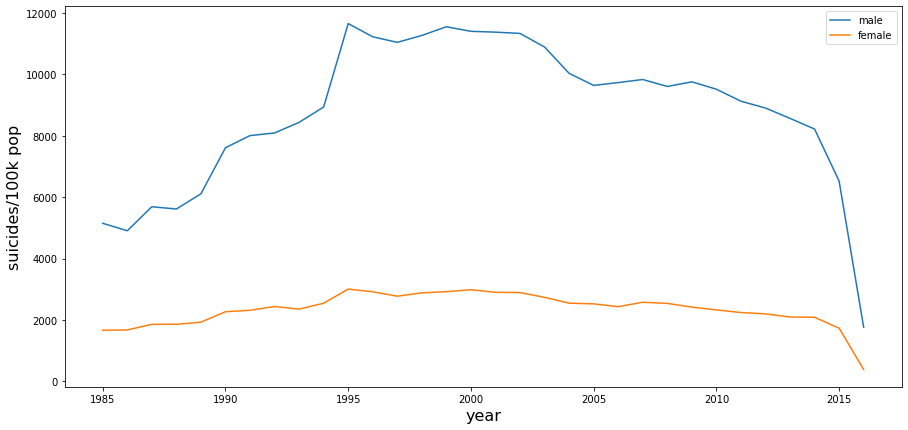

In [50]:

# separating male and female data
df4 = df.loc[df['sex']=='male']
df5 = df.loc[df['sex']=='female']
# grouping by years taking means
df6 = df4.groupby('year').sum()
df7 = df5.groupby('year').sum()
# plotting both male and female suicide rate data with sns.lineplot
sns.lineplot(x=df6.index, y=df6['suicides/100k pop'],label='male')
sns.lineplot(x=df7.index, y=df7['suicides/100k pop'],label='female')
plt.show()

Q2 D

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

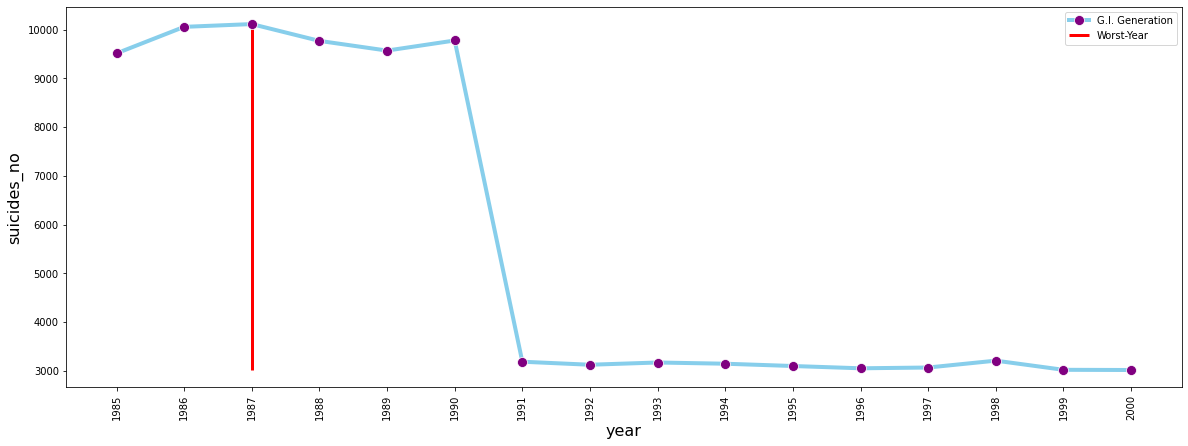

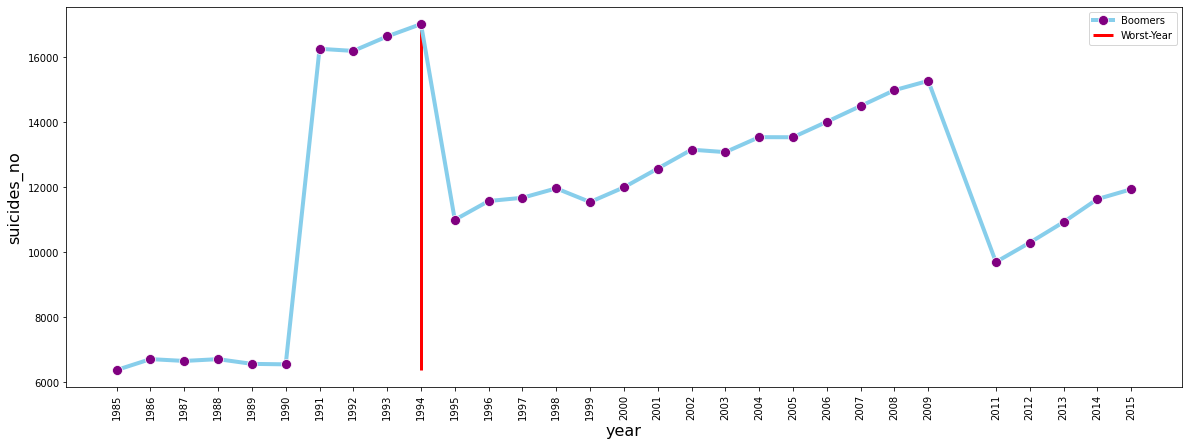

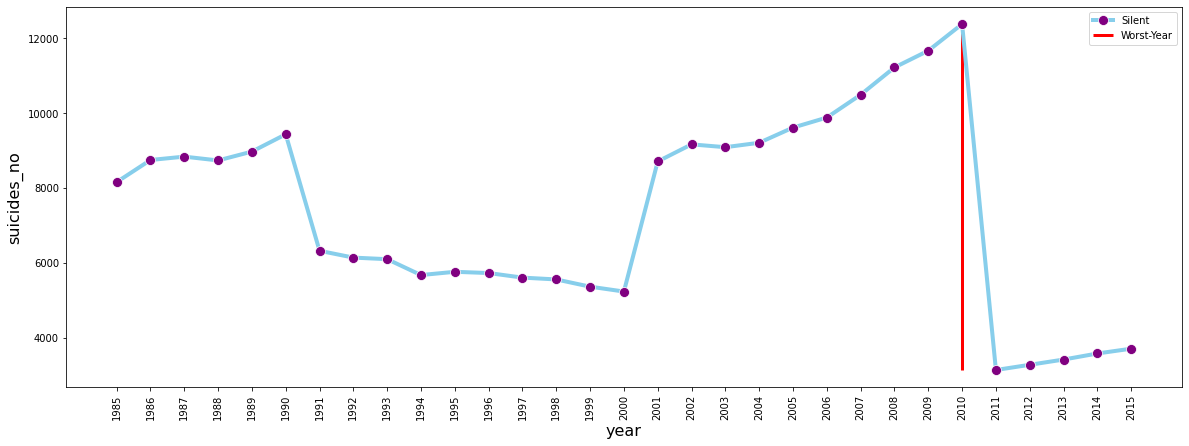

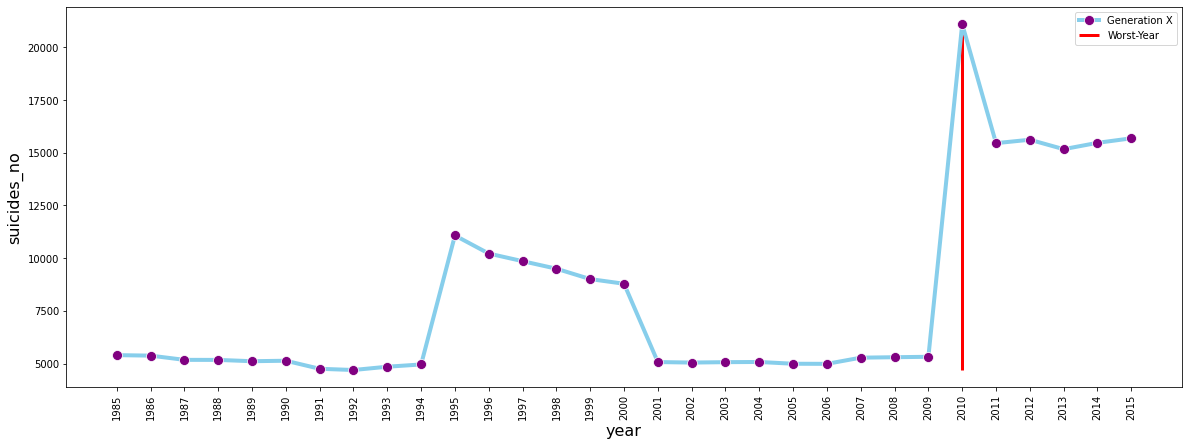

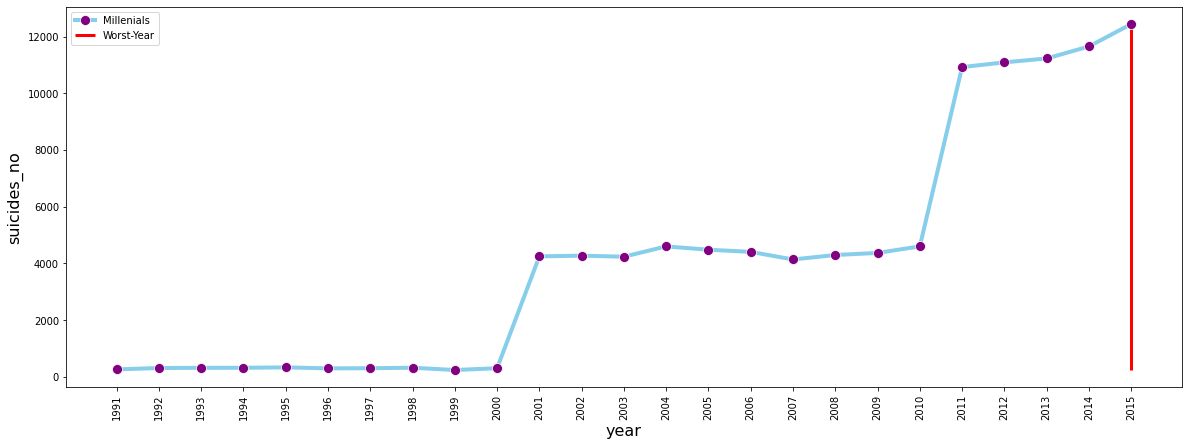

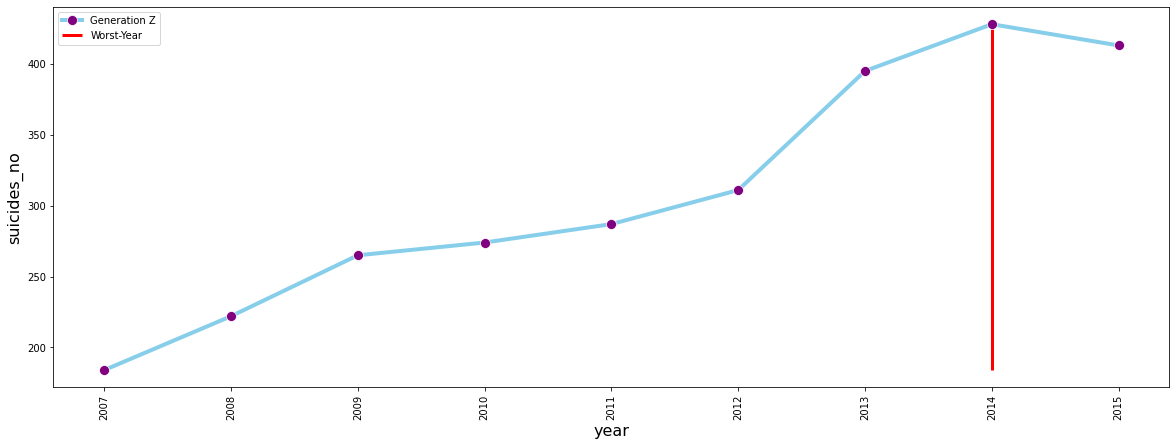

In [51]:
data_US=df.loc[df['country'] == 'United States']  #Worst Year for each generation
for gen in data_US['generation'].unique():
    alpha_d=data_US.loc[data_US['generation']==gen]
    alpha=alpha_d.groupby(['year']).sum()
    fig = plt.figure(figsize=(20,7)) 
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['axes.titlesize'] = 16
    plt.xticks(alpha.index)
    plt.xticks(fontsize='medium',rotation=90,)
    plt.yticks(fontsize='medium') 
    plt.vlines(alpha['suicides_no'].idxmax(),alpha['suicides_no'].min(),alpha['suicides_no'].max(), linestyles ="solid", colors ="r",lw=3, label='Worst-Year')
    sns.lineplot(x=alpha.index, y=alpha['suicides_no'],linewidth=4,label=gen,color='skyblue',marker='o',markerfacecolor='purple',markersize=10)
    plt.show()
    print(" ")




    
    


Q2 E


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

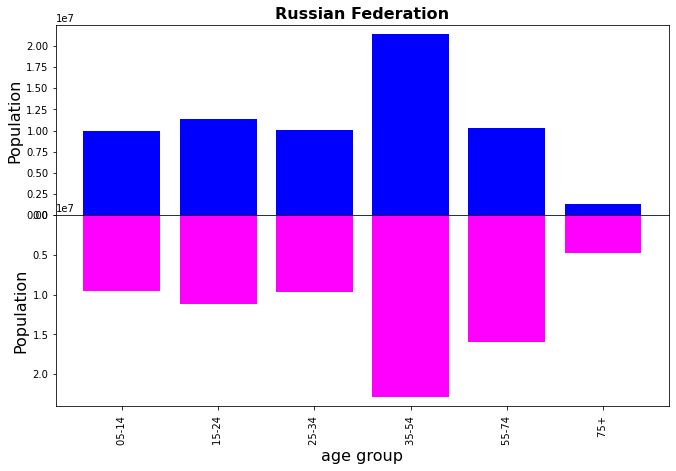

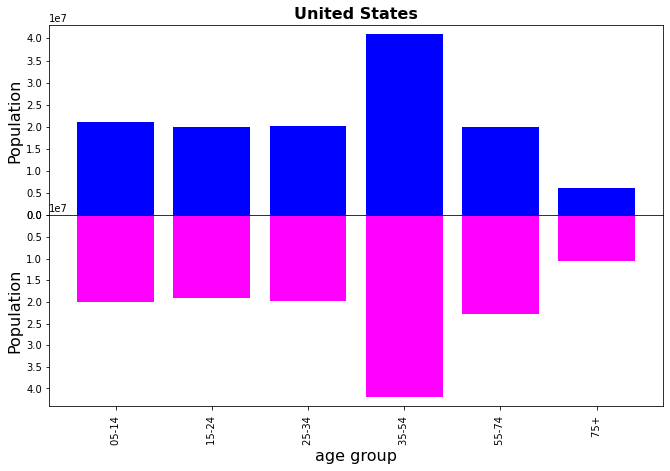

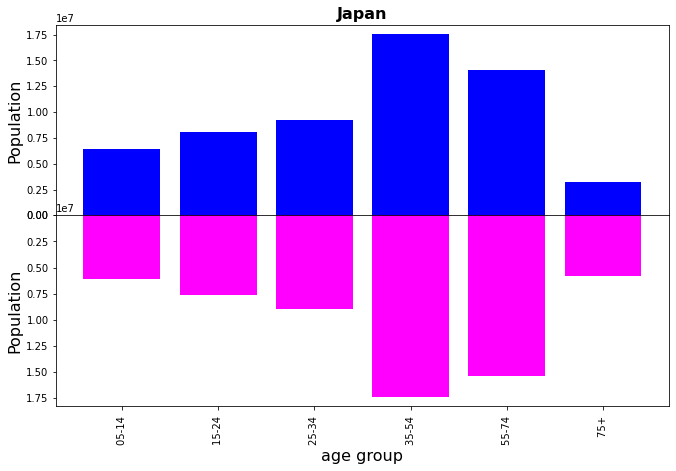

In [52]:
countries = ['Russian Federation', 'United States','Japan']
for country in countries:

    beta_m=df.loc[(df['year']==2000) & (df['country']== country)& (df['sex']== 'male')][['age','population']].sort_values(by=['age'])
    beta_m=beta_m.rename(columns={'population':'population_m'})        #male database
    beta_f=df.loc[(df['year']==2000) & (df['country']==country)& (df['sex']== 'female')][['age','population']].sort_values(by=['age'])
    beta_f=beta_f.rename(columns={'population':'population_f'})        #feamle database
   
    beta=pd.merge(beta_m, beta_f, on='age')                            #merging the data to get both the population entries into one table
    
    # For bihistogram plot creating subplot with 2 rows and 1 column
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(11,7))
    # seelcting an axis, color and data for each plot
    for ax, column, color, invert in zip(axes.ravel(), ['population_m','population_f'], ['blue', 'magenta'],  [False,True]):
        ax.bar(beta['age'],beta[column],  color=color)
        plt.xticks(rotation=90)
        ax.set(xlabel='age group',ylabel='Population')
        # inverting if counter invert is true(alternative)
        if invert:
            ax.invert_yaxis()
        # alternatively plotting title as we need one title for bihist
        else :
            ax.set_title(country, fontweight='bold')
    # To stick bihistograms together making hspace between them=0
    plt.subplots_adjust(hspace=0)



Q2 F

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

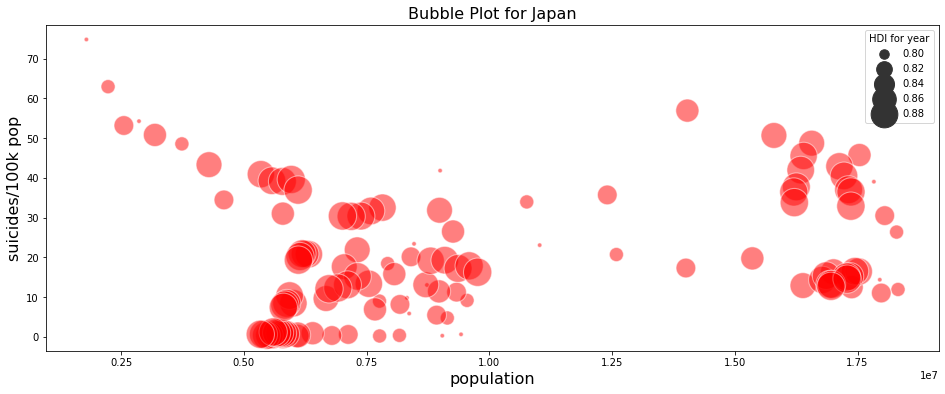

In [53]:
countries_f=['Japan']
for country in countries_f:
    gamma= df.loc[(df['country']== country)][['suicides/100k pop','HDI for year','population']]

    fig=plt.figure(figsize=(16,6))
    
    sns.scatterplot(data=gamma, x="population", y="suicides/100k pop",size="HDI for year", color='red', alpha=0.5, sizes=(20, 800))
    plt.title("Bubble Plot for "+country)
    plt.show()      
    print(" ")    

As evident, the size of bubble gets smaller as the suicide rate increases. Thus for sure, lesser HDI leads to higher suicide rates due to various factors like unemployment, lack of good health practices, radicalisation and(or) war stricken areas.
Also, it is observed that with increasing population the suicides/100K population is higher even for the same HDI. Thus competition for employment and striving for living conditions may force people to suicide.